# Uneven rhythms

In this example, we will go through the methods section of a classic study by [Repp, London, and Keller (2005)](https://doi.org/10.1525/mp.2005.23.1.61).
A PDF for the paper is available [here](https://www.researchgate.net/publication/38136482_Production_and_synchronization_of_uneven_rhythms_at_fast_tempi).

This example makes heavy use of list comprehensions. If you do not yet understand those fully, best to take a look at [this tutorial](https://www.freecodecamp.org/news/list-comprehension-in-python/) before reading on.

First we do some necessary imports:

In [2]:
from thebeat.rhythm import Rhythm
from thebeat.core import Sequence, SoundStimulus, SoundSequence
import numpy as np

In [3]:
# We suppress warnings, but let's hide that to avoid confusion
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

---

In the experiment in Repp, London, and Keller (2005), the production of and synchronization with 'uneven' rhythms was tested. These are rhythms with unusual subdivisions of timing (i.e. non-binary). The used rhythms are reproduced below. We will only make the {2, 3} set; at the end of this example you will be able to make the other ones yourself.

---

Object of type Rhythm.
Time signature: (5, 8)
Number of bars: 1.0
Beat (ms): 170
Number of events: 2
IOIs: [340. 510.]
Onsets:[  0. 340.]
Name: None



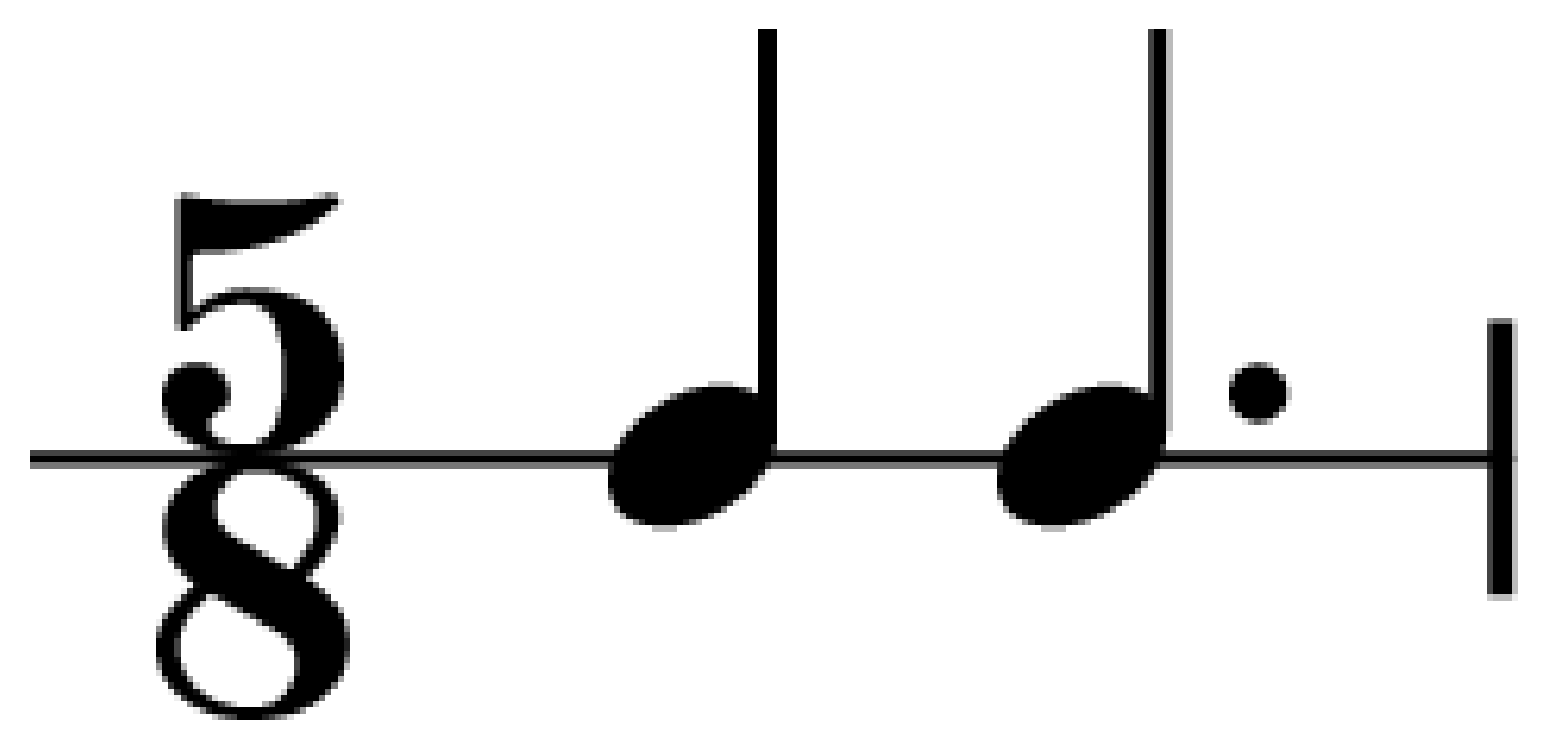

In [4]:
r_23 = Rhythm.from_integer_ratios([2, 3], beat_ms=170, time_signature=(5, 8))
print(r_23)

r_23.plot_rhythm();

To elongate this rhythm we can do:

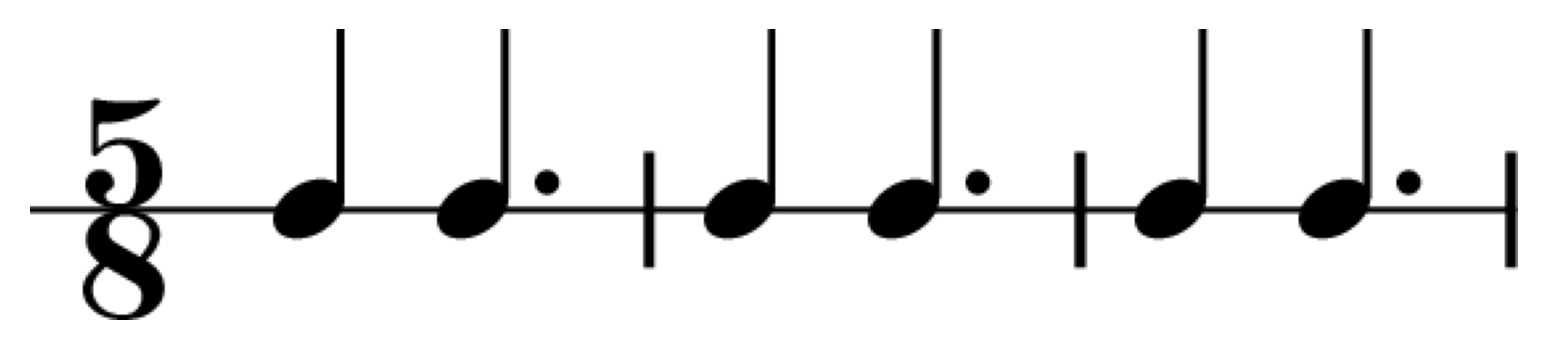

In [5]:
r_23 = r_23 * 3
r_23.plot_rhythm();

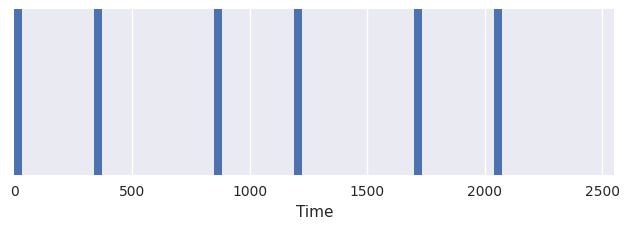

In [6]:
seq = r_23.to_sequence()
fig, ax = seq.plot_sequence();

---

## Creating the {2, 3} set

In the method section it says:

> "\[The tempo\] decreased from 170 ms in the first trial to 100 ms in the eighth trial, in steps of -10 ms."

So, we'll now create the two rhythms of the {2, 3} set at the eight different tempi mentioned above. For convenience, we'll call the set 'Set A' from now on. 

In [7]:
# Create tempi
tempi = np.arange(170, 90, -10)  # as arange does not include the enpoint we stop at 90 instead of 100
print(tempi)

[170 160 150 140 130 120 110 100]


In [8]:
set_a = []

for tempo in tempi:
    set_a.append(Rhythm.from_integer_ratios([2, 3] * 3, 
                                            beat_ms=tempo, 
                                            time_signature=(5, 4), 
                                            name=f"2_3_{tempo}ms"))
    set_a.append(Rhythm.from_integer_ratios([3, 2] * 3, 
                                            beat_ms=tempo, 
                                            time_signature=(5, 4), 
                                            name=f"3_2_{tempo}ms"))

# Let's see what Set A looks like now
print(set_a)

[Rhythm(name=2_3_170ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=3_2_170ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=2_3_160ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=3_2_160ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=2_3_150ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=3_2_150ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=2_3_140ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=3_2_140ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=2_3_130ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=3_2_130ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=2_3_120ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=3_2_120ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=2_3_110ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=3_2_110ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=2_3_100ms, n_bars=3.0, time_signature=(5, 4)), Rhythm(name=3_2_100ms, n_bars=3.0, time_signature=(5, 4))]


In [9]:
# 1. generate a sound (2640 Hz acc. to the paper, duration wasn't specified)
stim = SoundStimulus.generate(freq=2640, duration_ms=50, offramp_ms=10)

# 2. convert all Rhythms to Sequence. We use a list comprehension here:
set_a_seqs = [rhythm.to_sequence() for rhythm in set_a]

# 3. generate trials. we also copy the name of the Sequence to the SoundSequence.
trials = [SoundSequence(stim, sequence, name=sequence.name) for sequence in set_a_seqs]

In [10]:
print(trials)

[SoundSequence(name=2_3_170ms, n_events=6), SoundSequence(name=3_2_170ms, n_events=6), SoundSequence(name=2_3_160ms, n_events=6), SoundSequence(name=3_2_160ms, n_events=6), SoundSequence(name=2_3_150ms, n_events=6), SoundSequence(name=3_2_150ms, n_events=6), SoundSequence(name=2_3_140ms, n_events=6), SoundSequence(name=3_2_140ms, n_events=6), SoundSequence(name=2_3_130ms, n_events=6), SoundSequence(name=3_2_130ms, n_events=6), SoundSequence(name=2_3_120ms, n_events=6), SoundSequence(name=3_2_120ms, n_events=6), SoundSequence(name=2_3_110ms, n_events=6), SoundSequence(name=3_2_110ms, n_events=6), SoundSequence(name=2_3_100ms, n_events=6), SoundSequence(name=3_2_100ms, n_events=6)]


---
That's it! We can now plot, play or write all these files to disk. We'll grab one which we'll plot and play. How to write all these files to disk you can see in the code block at the bottom of this page.

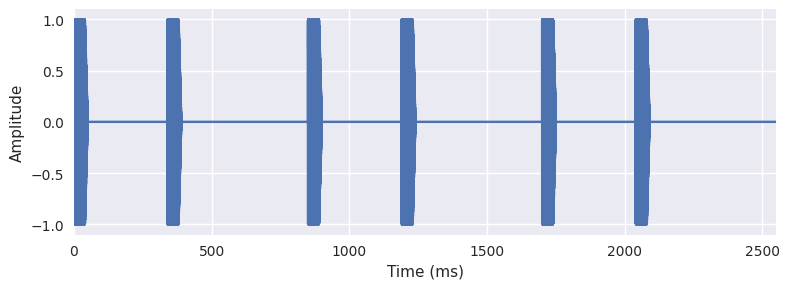

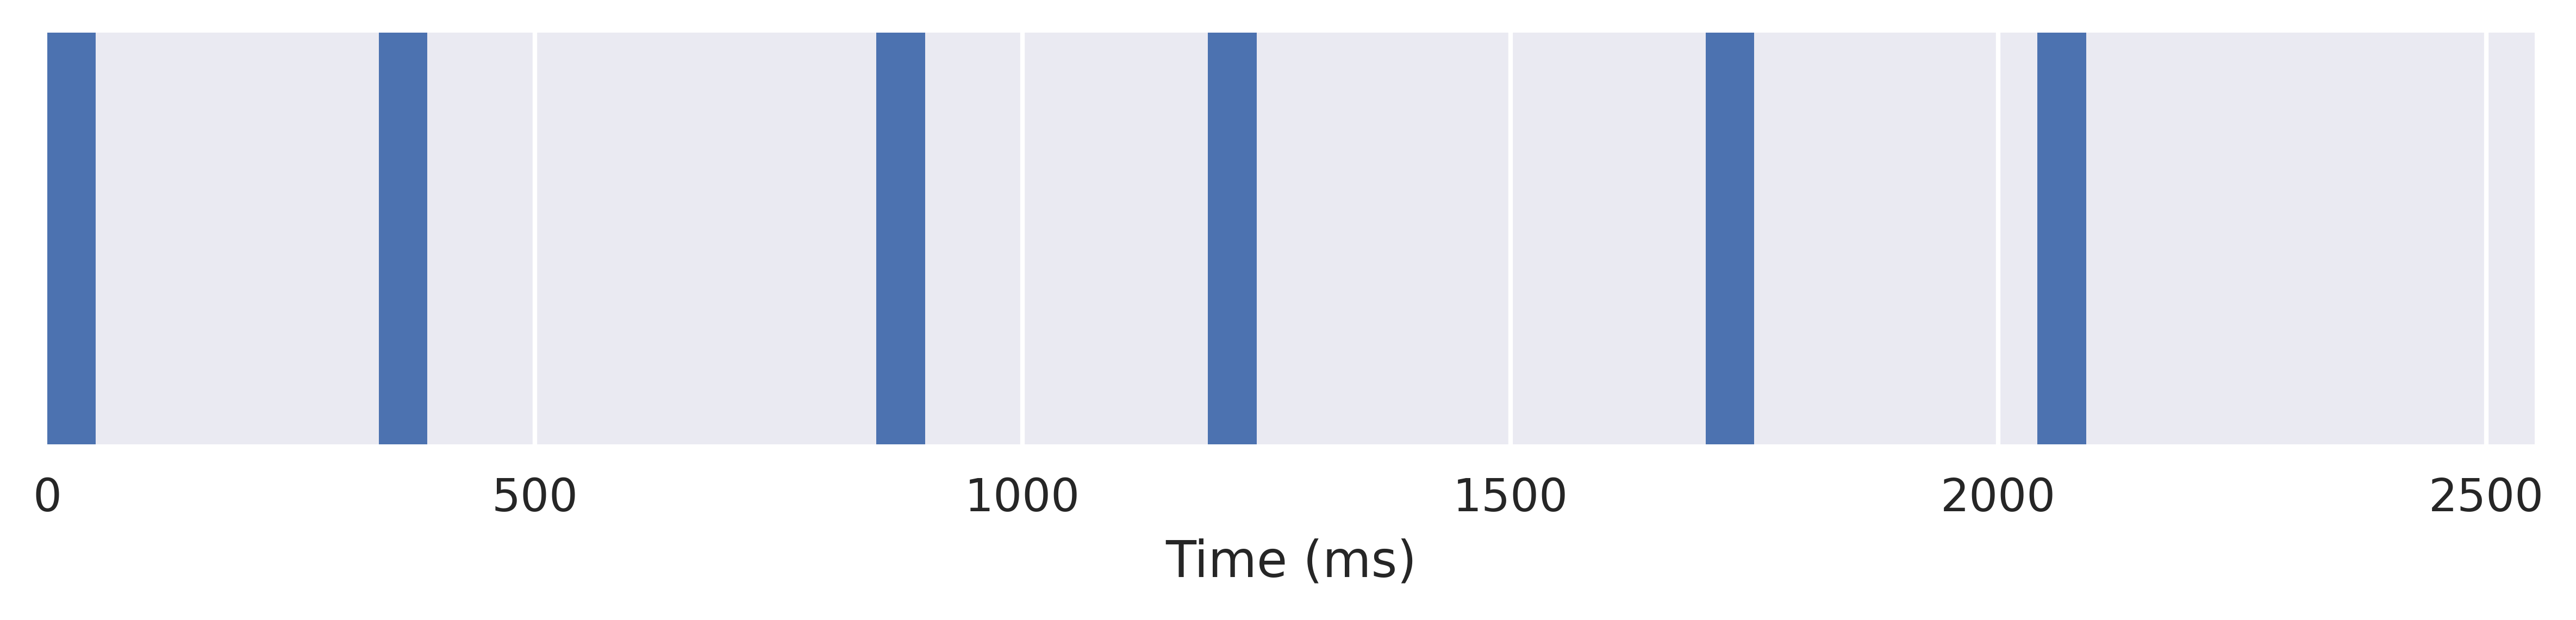

In [11]:
random_trial = trials[0]

random_trial.plot_waveform(figsize=(8, 3));
random_trial.plot_sequence(figsize=(8, 2), dpi=600);

In [12]:
from IPython.display import Audio
Audio(random_trial.samples, rate=random_trial.fs)

## Writing everything to disk

To write all these files as wav files to disk, you could do:

    for trial in trials:
        trial.write_wav('output_dir')

This would use the names that we gave the trials as the output filename, for instance "2_3_170ms.wav".

## Code summary

In [13]:
from thebeat.rhythm import Rhythm
from thebeat.core import Sequence, SoundStimulus, SoundSequence
import numpy as np

tempi = np.arange(170, 90, -10)

set_a = []

for tempo in tempi:
    set_a.append(Rhythm.from_integer_ratios([2, 3, 2, 3, 2, 3], 
                                            beat_ms=tempo, 
                                            time_signature=(5, 4), 
                                            name=f"2_3_{tempo}ms"))
    set_a.append(Rhythm.from_integer_ratios([3, 2, 3, 2, 3, 2], 
                                            beat_ms=tempo, 
                                            time_signature=(5, 4), 
                                            name=f"3_2_{tempo}ms"))

stim = SoundStimulus.generate(freq=2640, duration_ms=50, offramp_ms=10)

set_a_seqs = [rhythm.to_sequence() for rhythm in set_a]

trials = [SoundSequence(stim, sequence, name=sequence.name) for sequence in set_a_seqs]